<h1>Tely 10 </h1>
<h2>How Successful has the Tely 10 been over the years?</h2>
<h3>A graphic presentation</h3>
By
Constance Gray & Abdul Shaji<br>
201050531, 201956968<br>
COMP 4304 - Fall 2021


In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import ipywidgets as widget
from ipywidgets import interact

In [2]:
#Load in the customer supplied Tely10 data file
df_master = pd.read_csv("tely10.csv")
df_master = df_master.fillna(0)
df_master.head()

,index,overall_place,bib,name,gun_time,division,division_place,gender_place,chip_time,city,year
0,0,1.0,3492.0,Colin Fewer,49:49,LM40-44,1/170,1.0,49:49,Paradise,2019
1,1,2.0,1477.0,Graydon Snider,51:11,LM35-39,1/216,2.0,51:11,Montreal,2019
2,2,3.0,2431.0,Matt Noseworthy,51:13,LM20-24,1/83,3.0,51:13,St. John's,2019
3,3,4.0,977.0,Blaine Penny,53:42,LM45-49,1/161,4.0,53:40,Calgary,2019
4,4,5.0,1653.0,Anne Johnston,54:25,LF35-39,1/312,1.0,54:24,St. John's,2019



<h2>Main goal [Visualization - Interactive] : </h2><h3>The following interactive chart has been designed to show participation in the Tely 10 over 15 years, broken down by age groups.</h3>

Code for adding together and then deleting rows referenced from: 
https://stackoverflow.com/questions/37947479/pandas-sum-two-rows-of-dataframe-without-rearranging-dataframe

In [3]:
# Create df's for each five year time frame
# 2005 - 2009
df5to9 = df_master[(df_master.year > 2004) & (df_master.year < 2010)].sort_values(['division'], 
                   ascending = (True)).groupby(['year', 'division']).count().reset_index()
df5to9 = df5to9[['year', 'division', 'index']]
df5to9 = df5to9.pivot(index = 'division', columns='year', values='index')#.reset_index()
#Replace all NaN values with 0's
df5to9.fillna(0, inplace = True)
# Add together the age groups to create ['Under 20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Over 80']
# Age group Under 20
df5to9.loc['LF-19'] += (df5to9.loc['LF<20'] + df5to9.loc['LM-19'] + df5to9.loc['LM<20'])
df5to9.drop(['LF<20', 'LM-19', 'LM<20'], inplace = True)
# Age group 20-29
df5to9.loc['LF20-24'] += (df5to9.loc['LF25-29'] + df5to9.loc['LM20-24'] + df5to9.loc['LM25-29'])
df5to9.drop(['LF25-29', 'LM20-24', 'LM25-29'], inplace = True)
# Age group 30-39
df5to9.loc['LF30-34'] += (df5to9.loc['LF35-39'] + df5to9.loc['LM30-34'] + df5to9.loc['LM35-39'])
df5to9.drop(['LF35-39', 'LM30-34', 'LM35-39'], inplace = True)
# Age group 40-49
df5to9.loc['LF40-44'] += (df5to9.loc['LF45-49'] + df5to9.loc['LM40-44'] + df5to9.loc['LM45-49'])
df5to9.drop(['LF45-49', 'LM40-44', 'LM45-49'], inplace = True)
# Age group 50-59
df5to9.loc['LF50-54'] += (df5to9.loc['LF55-59'] + df5to9.loc['LM50-54'] + df5to9.loc['LM55-59'])
df5to9.drop(['LF55-59', 'LM50-54', 'LM55-59'], inplace = True)
# Age group 60-69
df5to9.loc['LF60-64'] += (df5to9.loc['LF65-69'] + df5to9.loc['LM60-64'] + df5to9.loc['LM65-69'])
df5to9.drop(['LF65-69', 'LM60-64', 'LM65-69'], inplace = True)
# Age group 70-79
df5to9.loc['LF70-74'] += (df5to9.loc['LF75-79'] + df5to9.loc['LM70-74'] + df5to9.loc['LM75-79'])
df5to9.drop(['LF75-79', 'LM70-74', 'LM75-79'], inplace = True)
# Age group Over 80
df5to9.loc['LF80+'] += df5to9.loc['LM80+']
df5to9.drop(['LM80+'], inplace = True)
# Rename all the rows to match the legends now that they have the correct totals
df5to9 = df5to9.rename(index={'LF-19':'Under 20', 'LF20-24':'20-29','LF30-34':'30-39', 'LF40-44':'40-49', 
                              'LF50-54':'50-59', 'LF60-64':'60-69', 'LF70-74':'70-79', 'LF80+':'Over 80' })
# Drop uncaqtegorized data with a single 1.0 value in a single year out of 5? **********
df5to9.drop(['LFNOAGE', 'WF'], inplace = True)

#Add a sum column for the show all view
df5to9['All'] = df5to9.sum(axis=1)
df5to9.reset_index()
#move the division column which was used as the index upon pivoting
df5to9['division'] = df5to9.index

In [4]:
# Code for adding together and then deleting rows referenced from: 
# https://stackoverflow.com/questions/37947479/pandas-sum-two-rows-of-dataframe-without-rearranging-dataframe
# Create df's for 2010 - 2014
df10to14 = df_master[(df_master.year > 2009) & (df_master.year < 2015)].sort_values(['division'], 
                   ascending = (True)).groupby(['year', 'division']).count().reset_index()
df10to14 = df10to14[['year', 'division', 'index']]
df10to14 = df10to14.pivot(index = 'division', columns='year', values='index')#.reset_index()
#Replace all NaN values with 0's
df10to14.fillna(0, inplace = True)
# Add together the age groups to create ['Under 20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Over 80']
# Age group Under 20
df10to14.loc['LF-19'] += df10to14.loc['LM-19'] 
df10to14.drop(['LM-19'], inplace = True)
# Age group 20-29
df10to14.loc['LF20-24'] += (df10to14.loc['LF25-29'] + df10to14.loc['LM20-24'] + df10to14.loc['LM25-29'])
df10to14.drop(['LF25-29', 'LM20-24', 'LM25-29'], inplace = True)
# Age group 30-39
df10to14.loc['LF30-34'] += (df10to14.loc['LF35-39'] + df10to14.loc['LM30-34'] + df10to14.loc['LM35-39'])
df10to14.drop(['LF35-39', 'LM30-34', 'LM35-39'], inplace = True)
# Age group 40-49
df10to14.loc['LF40-44'] += (df10to14.loc['LF45-49'] + df10to14.loc['LM40-44'] + df10to14.loc['LM45-49'])
df10to14.drop(['LF45-49', 'LM40-44', 'LM45-49'], inplace = True)
# Age group 50-59
df10to14.loc['LF50-54'] += (df10to14.loc['LF55-59'] + df10to14.loc['LM50-54'] + df10to14.loc['LM55-59'])
df10to14.drop(['LF55-59', 'LM50-54', 'LM55-59'], inplace = True)
# Age group 60-69
df10to14.loc['LF60-64'] += (df10to14.loc['LF65-69'] + df10to14.loc['LM60-64'] + df10to14.loc['LM65-69'])
df10to14.drop(['LF65-69', 'LM60-64', 'LM65-69'], inplace = True)
# Age group 70-79
df10to14.loc['LF70-74'] += (df10to14.loc['LF75-79'] + df10to14.loc['LM70-74'] + df10to14.loc['LM75-79'])
df10to14.drop(['LF75-79', 'LM70-74', 'LM75-79'], inplace = True)
# Age group Over 80
df10to14.loc['LF80+'] += df10to14.loc['LM80+']
df10to14.drop(['LM80+'], inplace = True)
# Rename all the rows to match the legends now that they have the correct totals
df10to14 = df10to14.rename(index={'LF-19':'Under 20', 'LF20-24':'20-29','LF30-34':'30-39', 'LF40-44':'40-49', 
                              'LF50-54':'50-59', 'LF60-64':'60-69', 'LF70-74':'70-79', 'LF80+':'Over 80' })
# Drop uncaqtegorized data with a single 1.0 value in a single year out of 5? **********
df10to14.drop(['LWA'], inplace = True)

#Add a sum column for the show all view
df10to14['All'] = df10to14.sum(axis=1)
df10to14.reset_index()
#move the division column which was used as the index upon pivoting
df10to14['division'] = df10to14.index

In [5]:
# Code for adding together and then deleting rows referenced from: 
# https://stackoverflow.com/questions/37947479/pandas-sum-two-rows-of-dataframe-without-rearranging-dataframe
# Create df's for 2015 - 2019
df15to19 = df_master[(df_master.year > 2014) & (df_master.year < 2020)].sort_values(['division'], 
                   ascending = (True)).groupby(['year', 'division']).count().reset_index()
df15to19 = df15to19[['year', 'division', 'index']]
df15to19 = df15to19.pivot(index = 'division', columns='year', values='index')#.reset_index()
#Replace all NaN values with 0's
df15to19.fillna(0, inplace = True)
# Add together the age groups to create ['Under 20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Over 80']
# Age group Under 20
df15to19.loc['LF-19'] += df15to19.loc['LM-19'] 
df15to19.drop(['LM-19'], inplace = True)
# Age group 20-29
df15to19.loc['LF20-24'] += (df15to19.loc['LF25-29'] + df15to19.loc['LM20-24'] + df15to19.loc['LM25-29'])
df15to19.drop(['LF25-29', 'LM20-24', 'LM25-29'], inplace = True)
# Age group 30-39
df15to19.loc['LF30-34'] += (df15to19.loc['LF35-39'] + df15to19.loc['LM30-34'] + df15to19.loc['LM35-39'])
df15to19.drop(['LF35-39', 'LM30-34', 'LM35-39'], inplace = True)
# Age group 40-49
df15to19.loc['LF40-44'] += (df15to19.loc['LF45-49'] + df15to19.loc['LM40-44'] + df15to19.loc['LM45-49'])
df15to19.drop(['LF45-49', 'LM40-44', 'LM45-49'], inplace = True)
# Age group 50-59
df15to19.loc['LF50-54'] += (df15to19.loc['LF55-59'] + df15to19.loc['LM50-54'] + df15to19.loc['LM55-59'])
df15to19.drop(['LF55-59', 'LM50-54', 'LM55-59'], inplace = True)
# Age group 60-69
df15to19.loc['LF60-64'] += (df15to19.loc['LF65-69'] + df15to19.loc['LM60-64'] + df15to19.loc['LM65-69'])
df15to19.drop(['LF65-69', 'LM60-64', 'LM65-69'], inplace = True)
# Age group 70-79
df15to19.loc['LF70-74'] += (df15to19.loc['LF75-79'] + df15to19.loc['LM70-74'] + df15to19.loc['LM75-79'])
df15to19.drop(['LF75-79', 'LM70-74', 'LM75-79'], inplace = True)
# Age group Over 80
df15to19.loc['LF80+'] += df15to19.loc['LM80+']
df15to19.drop(['LM80+'], inplace = True)
# Rename all the rows to match the legends now that they have the correct totals
df15to19 = df15to19.rename(index={'LF-19':'Under 20', 'LF20-24':'20-29','LF30-34':'30-39', 'LF40-44':'40-49', 
                              'LF50-54':'50-59', 'LF60-64':'60-69', 'LF70-74':'70-79', 'LF80+':'Over 80' })
# Drop uncaqtegorized data with a single 1.0 value in a single year out of 5? **********
df15to19.drop(['LWA', 'LP'], inplace = True)
#Add a sum column for the show all view
df15to19['All'] = df15to19.sum(axis=1)
df15to19.reset_index()
#move the division column which was used as the index upon pivoting
df15to19['division'] = df15to19.index

The following website was used to correct thin bar widths when using hue.
https://github.com/mwaskom/seaborn/issues/970

In [6]:
# Create a dropdown list to allow the user to change the visualiztion of the data
# Default will be all 3 X 5-year data sets, the dropdown list will change the display to 
# only the 5-year period selected
dropL = ["All", "2005 - 2009", "2010 - 2014", "2015 - 2019"]
@interact(years = widget.Dropdown(options = dropL, description = 'View: '))
def f(years):
    fig = plt.figure(figsize = (12, 8))
    
    if (years == 'All'):
        #Seaborn
        ax1 = fig.add_axes([0.05,0,0.35,1])
        ax1 = sns.barplot(x= 'division', y= 'All', data=df5to9)
        ax1.set_ylabel("Number of participants")
        ax1.set_xlabel("2005-2009")
        ax1.set(xticklabels=[])
        ax1.tick_params(bottom = False)
       
    
                
        ax2 = fig.add_axes([0.4,0,0.35,1])
        ax2 = sns.barplot(x= 'division', y = 'All', data = df10to14)
        ax2.set(yticklabels=[])
        ax2.y_axis = ax2.axes.get_yaxis()
        ax2.y_axis.set_visible(False)
        ax2.set(xticklabels=[])
        ax2.tick_params(bottom = False)
        ax2.set_xlabel("2010-2014")
        ax2.set_title('Tely 10 - Participation by Age Divisions')
        
        ax3 = fig.add_axes([0.75,0,0.35,1])
        ax3 = sns.barplot(x= 'division', y = 'All', data=df15to19, hue = 'division', dodge = False)
        ax3.set(yticklabels=[])
        ax3.y_axis = ax3.axes.get_yaxis()
        ax3.y_axis.set_visible(False)
        ax3.set(xticklabels=[])
        ax3.tick_params(bottom = False)
        ax3.set_xlabel("2015-2019")
       
        
        plt.legend(bbox_to_anchor = (1,1), fontsize = 'large')
        
    if (years == '2005 - 2009'):
        #Seaborn
        ax1 = fig.add_axes([0,0,1,1])
        ax1 = sns.barplot(x= 'division', y= 'All', data=df5to9, hue = 'division', dodge = False)
        ax1.set_ylabel("Number of participants")
        ax1.set_xlabel("Divisions")

        
        ax1.tick_params(bottom = False)
        ax1.set_title('Tely 10 - Participation by Age Divisions - Years 2005-2009')

        
        plt.legend(fontsize = 'large', title = 'Years: 2005-2009')

    if (years == '2010 - 2014'):
        #Seaborn
        ax1 = fig.add_axes([0,0,1,1])
        ax1 = sns.barplot(x= 'division', y= 'All', data=df10to14, hue = 'division', dodge = False)
        ax1.set_ylabel("Number of participants")
        ax1.set_xlabel("Divisions")

        
        ax1.tick_params(bottom = False)
        ax1.set_title('Tely 10 - Participation by Age Divisions - Years: 2010-2014')

        
        plt.legend(fontsize = 'large', title = 'Years: 2010-2014')

    if (years == '2015 - 2019'):
        #Seaborn
        ax1 = fig.add_axes([0,0,1,1])
        ax1 = sns.barplot(x= 'division', y= 'All', data=df15to19, hue = 'division', dodge = False)
        ax1.set_ylabel("Number of participants")
        ax1.set_xlabel("Divisions")

        
        ax1.tick_params(bottom = False)
        ax1.set_title('Tely 10 - Participation by Age Divisions - Years: 2015-2019')

        
        plt.legend(fontsize = 'large', title = 'Years: 2015-2019')

interactive(children=(Dropdown(description='View: ', options=('All', '2005 - 2009', '2010 - 2014', '2015 - 201…

<h2>Main goal [Visualization - Explanatory] :</h2><h3> How successful the Tely 10 has been over the years, measured by total number of participants </h3>

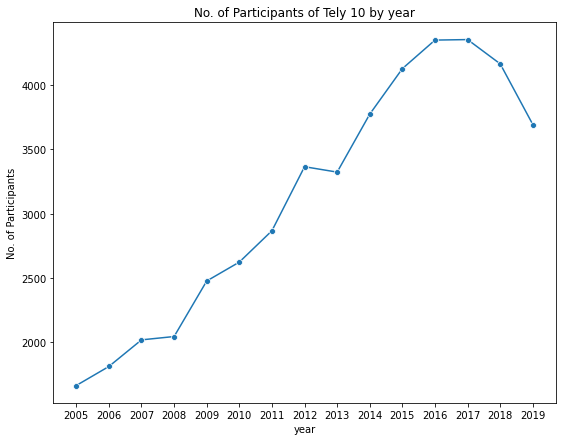

In [7]:
df = df_master
df['participantsbyyear'] = 0

# finding number of participants per year
x = df.groupby('year').count().reset_index()
allyears = x['year'].unique()

#plotting graph
fig, ax = plt.subplots(figsize =(9,7))
ax = sns.lineplot(x='year', y='participantsbyyear', data = x, marker = "o")
ax.set_title("No. of Participants of Tely 10 by year")
ax.set_ylabel("No. of Participants")
ax.set_xticks(allyears)
plt.show()

<h2>Subgoal [Visualization - Exploratory, interactive] :<h2>
    <h3>What is the proportion of participation by the top 20 participating cities over the years</h3>

This chart was originally proposed as a stacked bar chart to show the proportion of in-province vs out-of-province participants. However, the data for city names had lots of variation in spelling, capitalization and punctuation marks, many of which would have required manual corrections to avoid. So instead, we decided to make a pie chart for the proportion of highest participating cities throughout the year, depending on which year would be selected by the user.

This is the graph chosen to be marked for originality. The donut was chosen for its interesting and less dull look compared to a pie chart. It also helps the cities stand out more because of the gap in the middle, and allows for easier identification or different segments within the chart. The concept for the graph itself is original as it gives the users information about the most participating cities rather than every city that participated so as to not overwhelm them with less significant information 

In [8]:
#interaction function with year as selected by user
def makechart(Year):
    number = df[df['year'] == Year]        #filtering out for selected year
    cities = number['city'].str.lower()    #converting all to lower case to avoid wrong city being chosen due to faulty capitalization
    number = number.assign(city= cities)   #replacing city column with the lower case city names 
    number = number.rename(columns={'index': 'participants'})  #renaming to an appropriate name
    
    #fixing spelling errors to avoid the same city being considered as seperate cities
    number.loc[number['city'] == "st john's", "city"] = "st. john's"
    number.loc[number['city'] == "st johns", "city"] = "st. john's"
    number.loc[number['city'] == "st. johns", "city"] = "st. john's"
    number.loc[number['city'] == "st.johns", "city"] = "st. john's"
    number.loc[number['city'] == "st.john's", "city"] = "st. john's"
    number.loc[number['city'] == "st john´s", "city"] = "st. john's"
    number.loc[number['city'] == "st. john´s", "city"] = "st. john's"
    
    number = number.groupby('city').count().reset_index()   #calculating number of participants from each city
    number = number[['city', 'participants']]               #extracting only required columns
    
    # sorting in descending order and extracting top 20 participating cities
    number = number.sort_values('participants', ascending = False) 
    number = number.head(20)
    
    #plotting pie chart
    fig = px.pie(number, values='participants', names='city', title=f'Participation by the Top 20 Participating Cities in {Year}', hole =0.4,
                width = 800, height = 700)
                
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show() 
    
    

interact(makechart, Year = df['year'].unique())


interactive(children=(Dropdown(description='Year', options=(2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 20…

<function __main__.makechart(Year)>

<h2>Subgoal [Visualization - Derived data types, Interactive] :</h2> <h3>How successful the Tely 10 has been over the years with men vs women?</h3>
<p>This chart was originally proposed as a lone scatterplot.  Proposal feedback pointed out that there were only two data points so the scatter would not represent what was intended.  To correct this we added two barplots at the top, one showing the percentage relationship between genders for the division/year, and the other showing the overall number of participants by gender.

In [9]:
#Look at the list of divisions
df_master.division.unique()

array(['LM40-44', 'LM35-39', 'LM20-24', 'LM45-49', 'LF35-39', 'LM55-59',
       'LM25-29', 'LM30-34', 'LM-19', 'LF20-24', 'LM50-54', 'LF25-29',
       'LF30-34', 'LF40-44', 'LM60-64', 'LF45-49', 'LF-19', 'LF55-59',
       'LF50-54', 'LM65-69', 'LF60-64', 'LF65-69', 'LM70-74', 'LM75-79',
       'LF80+', 'LWA', 'LF70-74', 'LF75-79', 'LM80+', 'LP', 'WF', 'LM<20',
       'LF<20', 'LFNOAGE'], dtype=object)

In [10]:
#Create a new dataframe for our plot and organize it by 'year' and 'division'
dfS = df_master.sort_values(['division'], ascending = (True)).groupby(['year', 'division']).count().reset_index()
dfS = dfS.pivot(index = 'year', columns='division', values='index').reset_index()
#Replace all NaN values with 0's
dfS.fillna(0, inplace = True)

In [11]:
#Create a list of male teams, female teams, and the divisions in general
womenL = ['LF20-24', 'LF25-29', 'LF30-34', 'LF35-39', 'LF40-44', 'LF45-49',
        'LF50-54', 'LF55-59', 'LF60-64', 'LF65-69', 'LF70-74', 'LF75-79', 'LF80+', 'LF<20']
menL = ['LM20-24', 'LM25-29', 'LM30-34', 'LM35-39', 'LM40-44', 'LM45-49',
       'LM50-54', 'LM55-59', 'LM60-64', 'LM65-69', 'LM70-74', 'LM75-79',
       'LM80+', 'LM<20']
unifiedL = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       'Over 80', 'Under 20']
#Create a list of the years for reference
yearL = dfS.year.unique()

#Code for finding the index of a string in a list came from:
#https://www.programiz.com/python-programming/methods/list/index

In [12]:
#Create new percentage columns for each division by gender

#Create a column to track the total number of females by year
dfS["Female Total"] = dfS['LF-19']
for women in womenL:
    #Create A Female Total column
    dfS["Female Total"] += dfS[women]
    #Get the index of the division
    col = womenL.index(women)
    #Create a total column for the division
    dfS[unifiedL[col] + ' Total'] = dfS[womenL[col]] + dfS[menL[col]]
    # Create the percentage column for each female division
    dfS[women + " Female Percent"] = dfS[women] / dfS[unifiedL[col] + ' Total']
    men = menL[col]
    # Create the percentage column for each male division
    dfS[men + " Male Percent"] = dfS[men] / dfS[unifiedL[col] + ' Total']
    
    
#Create a column to track the total number of females by year
dfS["Male Total"] = dfS['LM-19']
for men in menL:
    #Create A Male Total column
    dfS["Male Total"] += dfS[men]
    
    #create the female percentage now that we have both numbers
    total = dfS["Female Total"] + dfS["Male Total"]
    #Create the new female column
    dfS["Female Percent"] = dfS["Female Total"] / total
    # Create the male percent column
    dfS["Male Percent"] = dfS["Male Total"] / total


dfS.fillna(0)

division,year,LF-19,LF20-24,LF25-29,LF30-34,LF35-39,LF40-44,LF45-49,LF50-54,LF55-59,...,LM75-79 Male Percent,Over 80 Total,LF80+ Female Percent,LM80+ Male Percent,Under 20 Total,LF<20 Female Percent,LM<20 Male Percent,Male Total,Female Percent,Male Percent
0,2005,0.0,65.0,88.0,105.0,139.0,137.0,113.0,68.0,32.0,...,1.000000,1.0,0.000000,1.000000,42.0,0.428571,0.571429,875.0,0.473842,0.526158
1,2006,0.0,74.0,105.0,99.0,129.0,156.0,124.0,99.0,37.0,...,0.571429,2.0,0.000000,1.000000,59.0,0.457627,0.542373,931.0,0.485635,0.514365
2,2007,0.0,55.0,103.0,140.0,140.0,182.0,148.0,119.0,57.0,...,0.666667,2.0,0.500000,0.500000,70.0,0.328571,0.671429,1017.0,0.496036,0.503964
3,2008,0.0,78.0,129.0,124.0,150.0,159.0,148.0,120.0,58.0,...,0.500000,3.0,0.333333,0.666667,57.0,0.438596,0.561404,1020.0,0.500978,0.499022
4,2009,32.0,106.0,183.0,189.0,195.0,183.0,163.0,148.0,69.0,...,0.666667,2.0,0.500000,0.500000,0.0,0.000000,0.000000,1163.0,0.530101,0.469899
5,2010,33.0,106.0,196.0,188.0,236.0,202.0,192.0,156.0,80.0,...,1.000000,3.0,0.333333,0.666667,0.0,0.000000,0.000000,1191.0,0.545940,0.454060
6,2011,42.0,119.0,222.0,248.0,268.0,227.0,206.0,171.0,96.0,...,0.750000,2.0,0.000000,1.000000,0.0,0.000000,0.000000,1196.0,0.582839,0.417161
7,2012,65.0,138.0,228.0,308.0,270.0,270.0,267.0,202.0,131.0,...,0.777778,3.0,0.000000,1.000000,0.0,0.000000,0.000000,1392.0,0.586330,0.413670
8,2013,63.0,124.0,246.0,268.0,303.0,293.0,240.0,185.0,126.0,...,0.400000,3.0,0.000000,1.000000,0.0,0.000000,0.000000,1404.0,0.577108,0.422892
9,2014,75.0,181.0,274.0,309.0,353.0,299.0,253.0,230.0,141.0,...,0.666667,5.0,0.200000,0.800000,0.0,0.000000,0.000000,1550.0,0.589295,0.410705


In [13]:
#Create the drop down lists to allow the viewer to shift between division and year
@interact(divDrop = widget.Dropdown(options= unifiedL, description = "Division: "),
         yearDrop = widget.Dropdown(options= dfS.year, description = "Year: "))
def g(divDrop,yearDrop):
    #Get the index of the selected division 
    index = unifiedL.index(divDrop)
    #Create the figure to hold the plot and assign the axes
    fig = plt.figure(figsize = (12, 8))
       
    #get the selected year
    df = dfS[(dfS.year == yearDrop)]
    #get the selected division
    fem = womenL[index] + ' ' + 'Female Percent'
    men = menL[index] + ' ' + 'Male Percent'
    dfDiv = df[[men, fem]] 
    values = [dfDiv[men], dfDiv[fem]]
    
    #Create the box plot representing the percentages selected 
    # for the given year and division
    div_ax = fig.add_axes([0,0.7,0.45,0.3])
    div_ax = sns.barplot(data=dfDiv)
    div_ax.set_title("Ages: " + divDrop + " Year: " + str(yearDrop))
    div_ax.set_xlabel('')
    div_ax.set_ylim(0.0,1.0)
    
    #Create the Overall boxplot representation of participation by numbers 
    #for the selected year
    overall_ax = fig.add_axes([0.5,0.7,0.45,0.3])
    dfOverall = df[["Male Total", "Female Total"]]
    overall_ax = sns.barplot(data=dfOverall)
    overall_ax.set_title('Overall Totals for ' + str(yearDrop))
    overall_ax.set_xlabel('')
    
    #Create the scatter plot showing the Male percentage of overall participation by year
    dfPercentM = dfS[['year',"Male Percent"]]
    percentM_ax = fig.add_axes([0,0,1,0.55])
    percentM_ax = sns.scatterplot(data=dfPercentM, x = 'year', y = "Male Percent", legend='auto')
    percentM_ax.set_ylim(0.0, 1.1)
    percentM_ax.set_ylabel("Percentage")
    percentM_ax.set_xlabel("Year")
    percentM_ax.set_xticks(yearL)
    percentM_ax.set_title("Percentage of Male VS Female Participants by Year")
    
    #Create the scatter plot showing the female percentage of overall participation by year
    # and add it to the percentage male axis    
    dfPercentF = dfS[['year', "Female Percent"]]
    percentF_ax = sns.scatterplot(data=dfPercentF, x = 'year', y = "Female Percent")


interactive(children=(Dropdown(description='Division: ', options=('20-24', '25-29', '30-34', '35-39', '40-44',…